In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from color_spectrum import Spectrum

In [2]:
spec = Spectrum()
spec._init_empty_colormeshes()
spec._colorize_colormeshes()

<Figure size 288x432 with 0 Axes>

In [3]:
# name = "red green blue white"
# rgbb = spec.get_colormesh(name)
# orig = rgbb[name].copy()

In [4]:
# mask = orig[:, :, 0] > 0.8 * orig[:, :, 1]**3 + 0.4

In [5]:
# cut = orig.copy()
# cut[mask] = 0

In [6]:
# fig, (ax_orig, ax_cut) = plt.subplots(ncols=2)
# ax_orig.imshow(orig, origin="lower")
# ax_orig.set_title("Original")
# ax_orig.set_xlabel("R")
# ax_orig.set_ylabel("G")
# ax_cut.imshow(cut, origin="lower")
# ax_cut.set_title(r"$R < 0.8 \cdot G^2$")
# ax_cut.set_xlabel("R")
# ax_cut.set_ylabel("G")
# fig.tight_layout()
# fig.savefig("/tmp/cut.png")

In [7]:
def plot_orig_cut(mesh, color0 = 0, color1 = 1, factor = 0, offset = 0, exponent = 1, mantisse = 1, dark=True):
    """Plots original and cut colormesh side to side.
    
    Parameter:
        mesh: numpy.ndarray with shape (256, 256, 3)
        dark: boolean if mesh is darker or lighter
        cut: dictinary
            
    """
    fig, (ax_orig, ax_cut) = plt.subplots(ncols=2, figsize=(8, 4))
    colors = {0: "R", 1: "G", 2: "B"}
    
    x0 = color0
    x1 = color1
    a = factor
    o = offset
    e = exponent
    m = mantisse
    mask = orig[:, :, x0] > a * (orig[:, :, x1] + o) ** e + m
    
    cut = mesh.copy()
    cut[mask] = 1 if dark else 0
    
    ax_orig.imshow(mesh, origin="lower")
    ax_orig.set_title("Original")
    ax_orig.set_xlabel(colors[x0])
    ax_orig.set_ylabel(colors[x1])
    ax_cut.imshow(cut, origin="lower")
    ax_cut.set_title(r"Cut-Out: ${} > {} \cdot ({} + {}) ^ {} + {}$".format(colors[x0], a, colors[x1], o, e, m))
    ax_cut.set_xlabel(colors[x0])
    ax_cut.set_ylabel(colors[x1])
    
    fig.tight_layout()
    
    return fig, cut

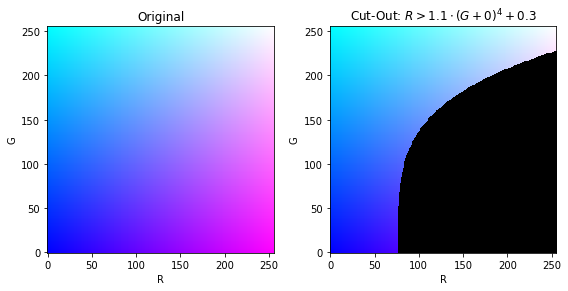

In [8]:
name = "red green blue white"
rgbb = spec.get_colormesh(name)
orig = rgbb[name].copy()
fig, cut = plot_orig_cut(mesh=orig, **{"color0": 0, "color1": 1, "factor": 1.1, "exponent": 4, "mantisse": 0.3}, dark=False)
fig.savefig("/tmp/cut.png")

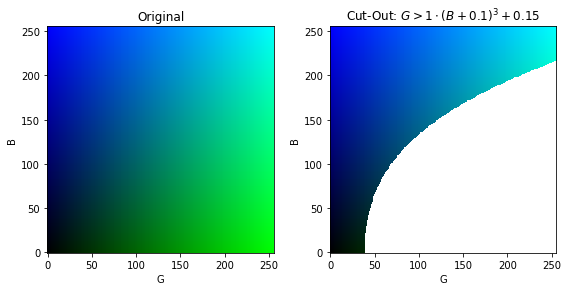

In [13]:
name = "green blue red black"
rgbb = spec.get_colormesh(name)
orig = rgbb[name].copy()
fig, cut = plot_orig_cut(orig, **{"color0": 1, "color1": 2, "factor": 1, "exponent": 3, "mantisse": 0.15, "offset": 0.1}, dark=True)

fig.savefig("/tmp/cut.png")

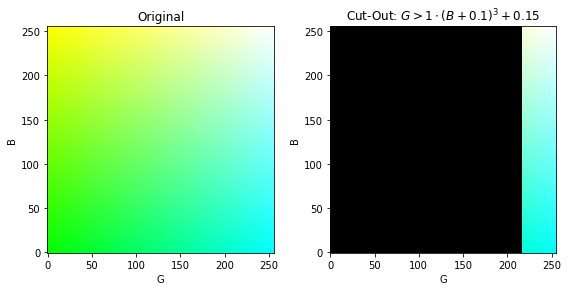

In [12]:
name = "blue red green white"
rgbb = spec.get_colormesh(name)
orig = rgbb[name].copy()
fig, cut = plot_orig_cut(orig, **{"color0": 1, "color1": 2, "factor": 1, "exponent": 3, "mantisse": 0.15, "offset": 0.1}, dark=False)

fig.savefig("/tmp/cut.png")